In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

**Make sure you have the CSV file wherever you are working on this notebook!**



Now let's read the data from the CSV file into a dataframe:

In [2]:
df=pd.read_csv("firearms-combined.csv")

## Effect of 2004 Assault Weapons Ban -- Continued

In [4]:
# Note that I went directly to a numpy array here, instead of making a list first
# The reason for using a numpy array is that we want to apply numpy methods for 
# computing statistics further below!

rate2005=np.array(df["RATE-2005"])
rate2014=np.array(df["RATE-2014"])



### Histograms

Another common visualization is to look at a histogram of the data. Unlike the histograms we previously generated, this data takes on real values, not just integers. Fortunately, Matplotlib has functions to do the hard work of making histograms for us:

(array([ 4.,  2.,  3.,  4.,  9., 10.,  4.,  6.,  5.,  3.]),
 array([ 2.6 ,  4.26,  5.92,  7.58,  9.24, 10.9 , 12.56, 14.22, 15.88,
        17.54, 19.2 ]),
 <a list of 10 Patch objects>)

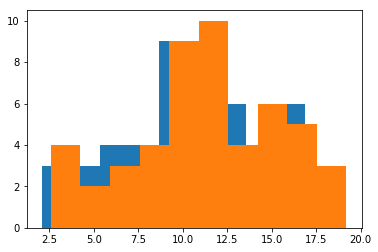

In [7]:
plt.hist(rate2005)
plt.hist(rate2014)

Some styling will help make this more legible:

(array([ 4.,  2.,  3.,  4.,  9., 10.,  4.,  6.,  5.,  3.]),
 array([ 2.6 ,  4.26,  5.92,  7.58,  9.24, 10.9 , 12.56, 14.22, 15.88,
        17.54, 19.2 ]),
 <a list of 10 Patch objects>)

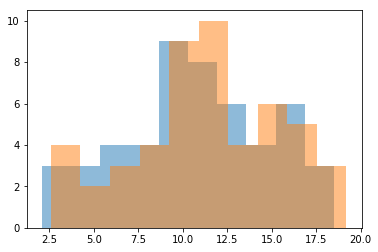

In [9]:
plt.hist(rate2005, alpha=0.5)
plt.hist(rate2014, alpha=0.5)

(array([ 3.,  3.,  1.,  3.,  6., 12.,  6.,  5.,  7.,  2.]),
 array([ 2.1 ,  3.74,  5.38,  7.02,  8.66, 10.3 , 11.94, 13.58, 15.22,
        16.86, 18.5 ]),
 <a list of 10 Patch objects>)

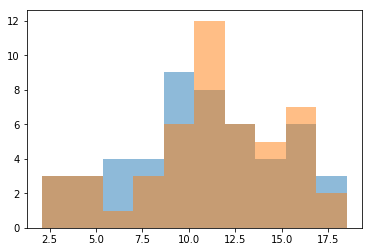

In [10]:
counts,bin_edges,_ = plt.hist(rate2005, alpha=0.5)
plt.hist(rate2014, alpha=0.5, bins=bin_edges)

Each bar of the histgram represents a "bin" of data values. In fact, the counts and bin edges are returned by the hist function

We can easily change the number of bins to provide more resolution:

(array([3., 1., 2., 1., 2., 4., 7., 5., 7., 2., 3., 5., 5., 0., 3.]),
 array([ 2.6       ,  3.70666667,  4.81333333,  5.92      ,  7.02666667,
         8.13333333,  9.24      , 10.34666667, 11.45333333, 12.56      ,
        13.66666667, 14.77333333, 15.88      , 16.98666667, 18.09333333,
        19.2       ]),
 <a list of 15 Patch objects>)

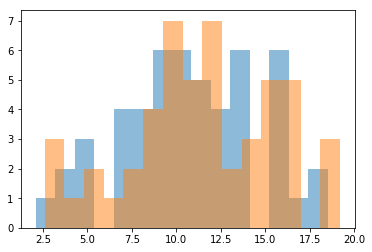

In [12]:
plt.hist(rate2005, alpha=0.5,bins=15)
plt.hist(rate2014, alpha=0.5,bins=15)

Let's add some information to make this more useful:

Text(0, 0.5, 'Counts')

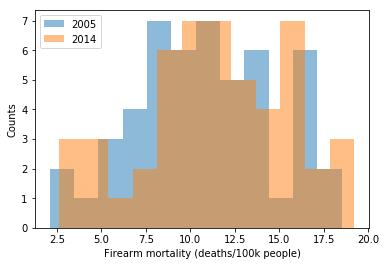

In [15]:
plt.hist(rate2005, alpha=0.5,bins=12,label="2005")
plt.hist(rate2014, alpha=0.5,bins=12,label="2014")
plt.legend()
plt.xlabel("Firearm mortality (deaths/100k people)")
plt.ylabel("Counts")

What inferences might you make from this plot?

However, it does not make sense to make the number of bins very large compared to the data size

# Summary Statistics

Summary statistics are values calculated from sample data that measure some characteristic about the data

The most commonly summary statistic is ?

The **average** or **sample mean**.

I will try to use the word **average** when referring to a value computed from data.

***What does the average mean?***

The value that minimizes the squared error to the data!!!

Both Pandas and numpu provide methods to calculate averages:

In [16]:
df["RATE-2005"].mean()

10.809999999999997

In [17]:
rate2005.mean()

10.809999999999997

In [18]:
np.mean(rate2014)

11.44

The sample mean of the 2014 data set is larger than that for the 2005 data set. This may indicate that the assault weapon ban is associated with an increase in firearms mortality

However, the difference is relatively small, as are the sample sizes (50)

In [19]:
diff = rate2014.mean()-rate2005.mean()
diff

0.6300000000000026

How could we conduct an experiment to determine if this difference might caused by sampling?

The null hypothesis is that there is no real difference between the two data sets, and any differences are just based on random sampling from the underlying population

So, let's assume that the two samples are from the same population. 

By combining (called **pooling**) the samples, we get a new subset of the original population, if the null hypothesis is true. Morever, any sample from this better represents the original population than either of the samples

We can whether the null hypothesis is true by checking how often samples from the pooled data set have a difference in means as large as the one observed 

**The big question**

To sample **with replacement** or **without replacement**

Sampling with replacement is called **bootstrapping** and is the most popular resampling technique. It is meant to better emulate independent sampling from the original population

Sampling without replacement better emulates (Fisher's) permutation tests, where we check every possible reordering of the data into samples. This will be discussed more later

Generally, sampling without replacement is more conservative (produces a higher $p$-value) than bootstrapping. Bootstraping is **easy** and **most popular**, and we apply it here:

In [20]:
import random

In [21]:
pooled=np.concatenate((rate2005,rate2014))

In [22]:
pooled

array([16. , 17.5, 16.1, 15.7,  9.5, 11.6,  5.3,  8.8, 10. , 12.1,  2.1,
       14.1,  8. , 11.2,  6.7,  9.3, 13. , 18.5,  7.8, 11.9,  3.4, 10.8,
        7. , 16. , 12.9, 16.9,  7.7, 16.1,  6.6,  5.2, 13.9,  5.3, 12.8,
        8.8,  9.6, 13.2, 10.7, 10.8,  3.6, 13.8, 10.2, 16. , 11.1, 10.1,
        6.8, 11.5,  8.8, 13.8,  8.5, 13.4, 16.9, 19.2, 13.5, 16.6,  7.4,
       12.2,  5. , 11.1, 11.5, 13.7,  2.6, 13.2,  9. , 12.4,  7.5, 11.3,
       13.9, 19. ,  9.4,  9. ,  3.2, 11.1,  6.6, 18.3, 15.3, 16.1,  9.5,
       14.8,  8.7,  5.3, 16. ,  4.2, 11.8, 12.3, 10.3, 15.7, 11.7, 10.5,
        3. , 15.5, 10.3, 15.1, 10.7, 12.3, 10.3, 10.3,  9.7, 14.6,  8.2,
       16.2])

How would we randomly choose from this data **with replacement**?

In [24]:
print(random.choices(pooled,k=50))

[11.5, 9.5, 10.8, 15.3, 7.5, 10.1, 16.9, 5.0, 5.0, 18.5, 15.7, 9.0, 16.9, 9.7, 3.6, 17.5, 12.1, 16.1, 15.3, 10.7, 12.3, 10.3, 6.6, 12.2, 9.7, 15.3, 11.3, 5.0, 7.8, 9.3, 16.6, 9.7, 15.7, 10.0, 12.1, 9.5, 13.8, 5.2, 7.8, 8.2, 3.6, 10.2, 8.2, 11.5, 12.3, 10.5, 16.6, 9.0, 11.3, 16.9]


```numpy.random``` has a similar method:

In [25]:
npr.choice(pooled,size=50)

array([16. , 13.9, 11.5, 12.3, 11.3, 12.8, 15.7, 12.9,  9. ,  8.7,  5. ,
       10.8, 10.7,  7.7, 11.8,  7. , 16.9,  9.3, 13.7,  8.8, 15.7, 11.1,
       15.7,  3. , 11.9, 14.6, 11.7, 14.6, 11.5, 11.7, 11.5, 10.3,  6.6,
        9.4, 12.1,  8.8,  3. , 15.7,  7.7,  8.8, 16.2,  9.4, 13.2, 12.9,
       12.4,  3.6,  8. , 10. ,  8.8,  5. ])

What are some problems with this approach?

What is the conclusion? 

## Effect of State Laws

The column "Total Laws 2014" shows the total number of gun laws in each state as of 2014. The data is from 

https://www.statefirearmlaws.org/resources

Now we have 2 data sources that are both in 2014, but they do not represent two samples from the same population. Instead, they represent two things that may depend on each other.

Again, the first thing to do is plot the data. When we have two sets of data that may be dependent, a scatter plot is usually the first tool to reach for:

What does this data suggest?

We don't know how to measure the dependence between two data sets like this **yet**

Let's see if we can turn this into into two data sets:

In fact, the data seems to fall into two clusters, one with < 50 laws and one with > 50 laws. 

Finding clusterings of data is a job computers are good at.

Let's use a standard clustering algorithm to see what it find.

The $K$-Means Algorithm is a randomized, iterative algorithm to cluster data. We will need to put the data into colums of a matrix as follows:

I will put details of the $K$-means algorithm online

Now let's partition the data accordingly:

**Note that less50 is a pandas series object. It also has a mean method, as well as other useful summary statistics**

Again, if we want to perform a binary hypothesis test, we need to pool the data and draw representative samples from it:

What is your conclusion?

What are some issues with this analysis?